# Hochschule Bonn-Rhein-Sieg

# Mathematics for Robotics and Control

# 04 - Applications of SVD

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Line fitting

The singular value decomposition allows us to solve linear least squares problems (you'll investigate this point a bit more thoroughly in the assignment), so fitting lines to points is one very interesting and useful thing that we can do with it.

Let's suppose that we are given a set of (potentially noisy) points that roughly lie on a line and that we want to reconstruct the parameters of the line, namely its slope $m$ and y-intercept $c$. Assuming that we have $n$ points, we can write $n$ line equations of the form

\begin{equation*}
    y_i = mx_i + c
\end{equation*}

where $1 \leq i \leq n$. We can write all these equations in a matrix form $A\mathbf{x} = \mathbf{b}$ as

\begin{equation*}
    \begin{pmatrix}
        x_1 & 1 \\
        \vdots & \vdots \\
        x_n & 1
    \end{pmatrix}
    \begin{pmatrix} m \\ c \end{pmatrix}
    = \begin{pmatrix} y_1 \\ \vdots \\ y_n \end{pmatrix}
\end{equation*}

This is an overdetermined system that cannot be solved directly. Now, as we know from the previous lecture, the SVD allows us to find the pseudo-inverse $A^+$ of matrices that are singular and non-square. As it turns out, overconstrained systems can be solved using the pseudo-inverse, i.e. we can find the unknown vector $\mathbf{x}$ as $\mathbf{x} = A^+ \mathbf{b}$, such that $\mathbf{x}$ can be shown to minimise $\lVert A\mathbf{x} - \mathbf{b} \lVert^2_2$.

We are now going to investigate this result by generating some noisy line points and then trying to fit a line to them.

Let's first generate a set of points and plot them.

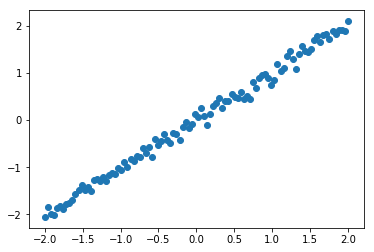

In [2]:
noise_std = 0.1
x = np.linspace(-2, 2, 100)
m = 1.
b = 0.
y = m * x + b + np.random.normal(0., noise_std, 100)

plt.scatter(x, y)
plt.show()

Now that we have a set of points, let us:
1. create the data matrix $A$ and the right-hand side vector $\mathbf{b}$
2. find the parameters of the line using $A$'s pseudo-inverse, and
3. finally plot the resulting line

In [ ]:
# write your code here

### Circle fitting

Even though it might seem so, we are not actually limited to fitting lines using the SVD. Other problems, such as that of fitting a circle, can be expressed in a linear least squares problem form as well, so they can be solved using the SVD.

Just as above, let's suppose that we are given a set of (potentially noisy) points that roughly lie on a circle and that we want to reconstruct the parameters of the circle, namely its centre $(a,b)$ and radius $r$. Assuming that we have $n$ points, we can write $n$ circle equations of the form

\begin{equation*}
    (x_i - a)^2 + (y_i - b)^2 = r^2
\end{equation*}

These are not linear equations, but let's square the terms and see where that gets us:

\begin{equation*}
    x_i^2 - 2ax_i + a^2 + y_i^2 - 2by_i + b^2 = r^2
\end{equation*}

At the moment, squaring the terms doesn't seem to have helped a lot. Anyway, let's now move all the unknown terms to one side, leaving the known ones on the other side and see if that helps:

\begin{equation*}
    2ax_i + 2by_i + r^2 - a^2 - b^2 = x_i^2 + y_i^2
\end{equation*}

We now have some nice linear terms on the left-hand side and a known term on the right-hand side, so we are getting closer to a linear system; we still have the squares of our unknowns, though, which prevents us from writing this as a linear equation. Now, the key idea to solving this problem is to note that we can define $k = r^2 - a^2 - b^2$ to be a new unknown parameter; if we further define $c_1 = 2a$, $c_2 = 2b$, and $s = x_i^2 + y_i^2$, we can write the above equation as

\begin{equation*}
    c_1x_i + c_2y_i + k = s
\end{equation*}

which is indeed linear. We now have three unknowns - $c_1$, $c_2$, and $k$ - and a set of $n$ equations, which can be written in the matrix form $A\mathbf{x} = \mathbf{b}$ as

\begin{equation*}
    \begin{pmatrix}
        x_1 & y_1 & 1 \\
        \vdots & \vdots & \vdots \\
        x_n & y_n & 1 \\
    \end{pmatrix}
    \begin{pmatrix} c_1 \\ c_2 \\ k \end{pmatrix}
    = \begin{pmatrix}
        x_1^2 + y_1^2 \\
        \vdots \\
        x_n^2 + y_n^2 \\
    \end{pmatrix}
\end{equation*}

This is an overdetermined system that we can solve using the pseudo-inverse of $A$, just as we did in the line fitting case. Once we solve the system, we can find the parameters of the circle as

\begin{align*}
    a &= \frac{c_1}{2} \\
    b &= \frac{c_2}{2} \\
    r &= \sqrt{k + a^2 + b^2}
\end{align*}

One important thing to note here is that we were only able to define $k$ just as we have done because it constrains the value of $r$ through the values of the other unknowns, namely $a$ and $b$; if this were not the case, we would not have been able to use this trick because we would not have been able to guarantee the consistency of the equations involving the unknown parameters.

We are now going to verify that what we have done here does indeed allow us to find the parameters of a circle. In order to do that, let's first generate a set of noisy circle points and plot them.

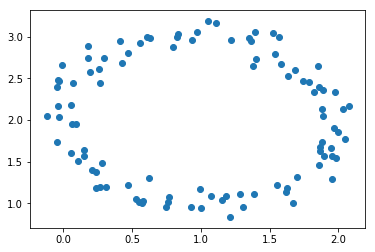

In [3]:
noise_std = 0.1
center = np.array([1., 2.])
theta = np.linspace(0., 2 * np.pi, 100)
x = center[0] + np.cos(theta) + np.random.normal(0., noise_std, 100)
y = center[1] + np.sin(theta) + np.random.normal(0., noise_std, 100)

plt.scatter(x, y)
plt.show()

Now that we have a set of points, let's solve the above set of linear equations by using the pseudo-inverse of $A$ and then plot the circle that can be generated with the found parameter values.

In [ ]:
# write your code here

### Principal component analysis (PCA) using the SVD

A few weeks ago, we had a look at principal component analysis (PCA), a dimensionality reduction technique that projects an $m$-dimensional data set onto a $k$-dimensional subspace, where $k < m$. As a reminder, given an $m \times n$ data matrix $X$ in which each of the $n$ columns is an $m$-dimensional vector, PCA performs the following steps:

1. We first need to find the covariance matrix of the $m$-components of $X$; the covariance matrix is usually denoted by $\Sigma$, but we'll denote it by $C$ this time in order to avoid confusion with the singular value matrix of the SVD decomposition
2. We then look for the eigenvalues and eigenvectors of $C$
3. The eigenvalues are sorted in decreasing order and the $k$ largest ones are taken
4. The eigenvectors corresponding to the $k$ largest eigenvalues are put in a matrix $W$
5. We finally project the original data onto the $k$ dimensional subspace: $Y = W^T X$

When we introduced PCA, we weren't really concerned with how the covariance matrix of $X$ is computed. The covariance matrix $C$ is actually defined as

\begin{equation*}
    C = \frac{(X - \bar{\mathbf{X}})(X - \bar{\mathbf{X}})^T}{n - 1}
\end{equation*}

where $\bar{\mathbf{X}}$ is the $m$-dimensional mean vector of $X$. If we now define $Y = \frac{X - \bar{\mathbf{X}}}{\sqrt{n-1}}$ as our zero-mean data matrix and then find the SVD decomposition of $Y$, we can note that

\begin{align*}
    C &= YY^T \\
    &= (U \Sigma V^T)(V \Sigma U^T) \\
    &= U\Sigma^2U^T
\end{align*}

where we've used the fact that $V$ is an orthogonal matrix, so $V^TV = I$.

Given that $U$ has the eigenvectors of $YY^T$, which are in turn the eigenvectors of the covariance matrix, we see that the SVD actually gives us the principal components for free. As the eigenvectors in $U$ are already sorted so that they correspond to the $k$ largest singular values, we can simply take the first $k$ columns of $U$ to be the principal components.

We are now going to repeat the PCA example of projecting our old point cloud onto a two-dimensional space, such that we will use the above procedure for obtaining the principal components. Let's first load the data and plot them, though.

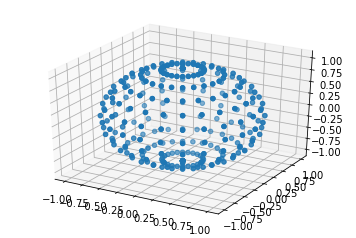

In [4]:
from mpl_toolkits.mplot3d import Axes3D

X = np.loadtxt('data/point_cloud.txt').T
figure = plt.figure(1)
ax = figure.add_subplot(111, projection='3d')
ax.scatter(X[0,:], X[1,:], X[2,:])
plt.show()

We are now ready to perform PCA. Let's write a little function that finds the principal components using the SVD of $Y$ and projects the data onto the $k$-dimensional space. We will then plot the results to see if they match the ones we obtained a few weeks ago.

In [ ]:
# write your code here